In [1]:
import numpy as np
import pandas as pd
import json
import glob
import os
import matplotlib.pyplot as plt

# # conduct error analysis
# data = []
# path = 'exp/exp1_en/init_all_iter_confidence/P103.jsonl'
# for line in open(path, "r", encoding="utf-8").readlines():
#     dic = json.loads(line)
#     keys = [ 'prompt', 'sub_label', 'obj_label', 'pred']
#     res = [dic[i] for i in keys[:-1] ]
#     res.append(''.join(dic['pred'][dic['num_mask']-1]))
#     obj_label = res[-2]
#     pred = res[-1]

#     if obj_label != pred:
#         data.append(res)

# #     if obj_label in pred and obj_label != pred:
# #         data.append(res)
# # data

,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
55,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος του Μεξικού,Μεξικό,[μεξικο],[μεξικο],"[Με, ##ξ, ##ικό]","[Με, ##ξ, ##ικού]",lsm
76,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία του Ουισκόνσιν,Ουισκόνσιν,"[ο, ##υ, ##ισκο, ##ν, ##σιν]","[ο, ##υ, ##ισκο, ##ν, ##σιν]","[Ο, ##υ, ##ι, ##σ, ##κό, ##ν, ##σι, ##ν]",[νησί],lsm
130,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία της Λουιζιάνα,Λουιζιάνα,"[λου, ##ιζ, ##ιαν, ##α]","[λου, ##ιζ, ##ιαν, ##α]","[Λ, ##ου, ##ι, ##ζ, ##ιά, ##να]","[Γ, ##ερ, ##ουσία]",lsm
171,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία του Κολοράντο,Κολοράντο,"[κολο, ##ραντ, ##ο]","[κολο, ##ραντ, ##ο]","[Κ, ##ο, ##λο, ##ρά, ##ντ, ##ο]",[νησί],lsm
193,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Σημαία του Πουέρτο Ρίκο,Πουέρτο Ρίκο,"[που, ##ερ, ##το, ρι, ##κο]","[που, ##ερ, ##το, ρι, ##κο]","[Π, ##ου, ##έρ, ##το, Ρ, ##ίκο]","[Ρ, ##ίκο]",lsm
238,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κυβερνήτης του Κολοράντο,Κολοράντο,"[κολο, ##ραντ, ##ο]","[κολο, ##ραντ, ##ο]","[Κ, ##ο, ##λο, ##ρά, ##ντ, ##ο]",[νησί],lsm
255,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Σημαία των Βερμούδων,Βερμούδες,"[βερ, ##μου, ##δες]","[βερ, ##μου, ##δες]","[Β, ##ερ, ##μού, ##δες]","[Β, ##ερ, ##μού, ##δων]",lsm
281,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εθνόσημο του Μεξικού,Μεξικό,[μεξικο],[μεξικο],"[Με, ##ξ, ##ικό]","[Με, ##ξ]",lsm
288,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Μέγας Δούκας του Λουξεμβούργου,Λουξεμβούργο,[λουξεμβουργο],[λουξεμβουργο],"[Λ, ##ου, ##ξε, ##μ, ##βο, ##ύ, ##ρ, ##γο]","[Δ, ##ούκα]",lsm
310,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Σημαία της Γαλλικής Γουιάνας,Γαλλική Γουιάνα,"[γαλλικη, γου, ##ιαν, ##α]","[γαλλικη, γου, ##ιαν, ##α]","[Γ, ##α, ##λ, ##λική, Γ, ##ου, ##ιά, ##να]","[Γ, ##ου, ##ιά]",lsm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
7,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
8,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
9,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κοινοβούλιο του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
14,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κυβερνήτης της Νέας Υόρκης,Νέα Υόρκη,"[νεα, υορκη]",[.],"[Νέα, Υ, ##ό, ##ρκ, ##η]","[Νέα, Υ, ##ό, ##ρκ, ##η]",mlm
18,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός της Αυστραλίας,Αυστραλία,[αυστραλια],[.],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λία]",mlm
20,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός της Ινδίας,Ινδία,[ινδια],[.],"[Ι, ##νδία]","[Ι, ##νδία]",mlm
27,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος της Ρωσίας,Ρωσία,[ρωσια],[.],"[Ρ, ##ωσία]","[Ρ, ##ωσία]",mlm
31,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Σκωτικό Κοινοβούλιο,Σκωτία,[σκωτια],[.],"[Σ, ##κ, ##ω, ##τία]","[Σ, ##κ, ##ω, ##τία]",mlm
35,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Ισραήλ,Ισραήλ,[ισραηλ],[κοσμο],"[Ι, ##σ, ##ρα, ##ήλ]","[Ι, ##σ, ##ρα, ##ήλ]",mlm
37,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης της Αυστραλίας,Αυστραλία,[αυστραλια],[.],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λία]",mlm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
5,[X] is a legal term in [Y] .,Lok Sabha,India,[India],[India],[India],"[Lok, Sabha]",lsm
34,[X] is a legal term in [Y] .,Rajya Sabha,India,[India],[India],[India],"[Raj, ##ya, Sabha]",lsm
40,[X] is a legal term in [Y] .,aktiebolag,Sweden,[Sweden],[Sweden],[Sweden],[Denmark],lsm
41,[X] is a legal term in [Y] .,Western Australian Legislative Assembly,Western Australia,"[Western, Australia]","[Western, Australia]","[Western, Australia]","[Western, Australian, Legislative, Assembly]",lsm
48,[X] is a legal term in [Y] .,aksjeselskap,Norway,[Norway],[Norway],[Norway],"[the, Netherlands]",lsm
86,[X] is a legal term in [Y] .,Knesset,Israel,[Israel],[Israel],[Israel],"[the, United, Kingdom]",lsm
129,[X] is a legal term in [Y] .,Seimas,Lithuania,[Lithuania],[Lithuania],[Lithuania],"[Sei, ##mas]",lsm
165,[X] is a legal term in [Y] .,Storting,Norway,[Norway],[Norway],[Norway],"[the, United, States]",lsm
224,[X] is a legal term in [Y] .,Parks Canada,Canada,[Canada],[Canada],[Canada],"[Parks, Canada]",lsm
229,[X] is a legal term in [Y] .,French National Assembly,France,[France],[France],[France],"[French, National, Assembly]",lsm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
4,[X] is a legal term in [Y] .,National Assembly of Quebec,Quebec,[Quebec],"[Quebec, ,, Canada]",[Quebec],[Quebec],mlm
7,[X] is a legal term in [Y] .,Legislative Assembly of British Columbia,British Columbia,"[British, Columbia]",[Canada],"[British, Columbia]","[British, Columbia]",mlm
8,[X] is a legal term in [Y] .,Legislative Assembly of Queensland,Queensland,[Queensland],[Australia],[Queensland],[Queensland],mlm
13,[X] is a legal term in [Y] .,Legislative Council of Hong Kong,Hong Kong,"[Hong, Kong]","[mainland, China]","[Hong, Kong]","[Hong, Kong]",mlm
15,[X] is a legal term in [Y] .,Legislative Assembly of Saskatchewan,Saskatchewan,[Saskatchewan],"[Saskatchewan, ,, Canada]",[Saskatchewan],[Saskatchewan],mlm
18,[X] is a legal term in [Y] .,Governor of New York,New York,"[New, York]","[the, American, Constitution]","[New, York]","[New, York]",mlm
20,[X] is a legal term in [Y] .,Governor of New Jersey,New Jersey,"[New, Jersey]","[American, federal, politics]","[New, Jersey]","[New, Jersey]",mlm
23,[X] is a legal term in [Y] .,New South Wales Legislative Assembly,New South Wales,"[New, South, Wales]",[Australia],"[New, South, Wales]","[New, South, Wales]",mlm
38,[X] is a legal term in [Y] .,Lieutenant Governor of New York,New York,"[New, York]","[the, American, Senate]","[New, York]","[New, York]",mlm
39,[X] is a legal term in [Y] .,Governor of North Carolina,North Carolina,"[North, Carolina]","[the, United, States, States]","[North, Carolina]","[North, Carolina]",mlm


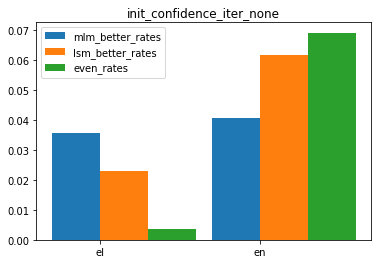

,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
55,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος του Μεξικού,Μεξικό,[μεξικο],[μεξικο],"[Με, ##ξ, ##ικό]","[Με, ##ξ, ##ικού]",lsm
76,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία του Ουισκόνσιν,Ουισκόνσιν,"[ο, ##υ, ##ισκο, ##ν, ##σιν]","[ο, ##υ, ##ισκο, ##ν, ##σιν]","[Ο, ##υ, ##ι, ##σ, ##κό, ##ν, ##σι, ##ν]",[νησί],lsm
130,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία της Λουιζιάνα,Λουιζιάνα,"[λου, ##ιζ, ##ιαν, ##α]","[λου, ##ιζ, ##ιαν, ##α]","[Λ, ##ου, ##ι, ##ζ, ##ιά, ##να]","[Γ, ##ερ, ##ουσία]",lsm
171,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία του Κολοράντο,Κολοράντο,"[κολο, ##ραντ, ##ο]","[κολο, ##ραντ, ##ο]","[Κ, ##ο, ##λο, ##ρά, ##ντ, ##ο]",[νησί],lsm
193,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Σημαία του Πουέρτο Ρίκο,Πουέρτο Ρίκο,"[που, ##ερ, ##το, ρι, ##κο]","[που, ##ερ, ##το, ρι, ##κο]","[Π, ##ου, ##έρ, ##το, Ρ, ##ίκο]","[Ρ, ##ίκο]",lsm
238,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κυβερνήτης του Κολοράντο,Κολοράντο,"[κολο, ##ραντ, ##ο]","[κολο, ##ραντ, ##ο]","[Κ, ##ο, ##λο, ##ρά, ##ντ, ##ο]",[νησί],lsm
255,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Σημαία των Βερμούδων,Βερμούδες,"[βερ, ##μου, ##δες]","[βερ, ##μου, ##δες]","[Β, ##ερ, ##μού, ##δες]","[Β, ##ερ, ##μού, ##δων]",lsm
281,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εθνόσημο του Μεξικού,Μεξικό,[μεξικο],[μεξικο],"[Με, ##ξ, ##ικό]","[Με, ##ξ]",lsm
288,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Μέγας Δούκας του Λουξεμβούργου,Λουξεμβούργο,[λουξεμβουργο],[λουξεμβουργο],"[Λ, ##ου, ##ξε, ##μ, ##βο, ##ύ, ##ρ, ##γο]","[Δ, ##ούκα]",lsm
310,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Σημαία της Γαλλικής Γουιάνας,Γαλλική Γουιάνα,"[γαλλικη, γου, ##ιαν, ##α]","[γαλλικη, γου, ##ιαν, ##α]","[Γ, ##α, ##λ, ##λική, Γ, ##ου, ##ιά, ##να]","[Γ, ##ου, ##ιά]",lsm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
7,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
8,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης του Καναδά,Καναδάς,[καναδα],"[., ., .]","[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
9,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κοινοβούλιο του Καναδά,Καναδάς,[καναδα],"[., .]","[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
14,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κυβερνήτης της Νέας Υόρκης,Νέα Υόρκη,"[νεα, υορκη]",[.],"[Νέα, Υ, ##ό, ##ρκ, ##η]","[Νέα, Υ, ##ό, ##ρκ, ##η]",mlm
18,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός της Αυστραλίας,Αυστραλία,[αυστραλια],[.],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λία]",mlm
20,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός της Ινδίας,Ινδία,[ινδια],[.],"[Ι, ##νδία]","[Ι, ##νδία]",mlm
27,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος της Ρωσίας,Ρωσία,[ρωσια],[.],"[Ρ, ##ωσία]","[Ρ, ##ωσία]",mlm
31,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Σκωτικό Κοινοβούλιο,Σκωτία,[σκωτια],[.],"[Σ, ##κ, ##ω, ##τία]","[Σ, ##κ, ##ω, ##τία]",mlm
35,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Ισραήλ,Ισραήλ,[ισραηλ],[κοσμο],"[Ι, ##σ, ##ρα, ##ήλ]","[Ι, ##σ, ##ρα, ##ήλ]",mlm
37,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης της Αυστραλίας,Αυστραλία,[αυστραλια],[.],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λία]",mlm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
5,[X] is a legal term in [Y] .,Lok Sabha,India,[India],[India],[India],"[Lok, Sabha]",lsm
11,[X] is a legal term in [Y] .,Parliament of Canada,Canada,[Canada],[Canada],[Canada],"[Parliament, of, Canada]",lsm
30,[X] is a legal term in [Y] .,Australian Labor Party,Australia,[Australia],[Australia],[Australia],"[the, Australian, Labor, Party]",lsm
34,[X] is a legal term in [Y] .,Rajya Sabha,India,[India],[India],[India],"[Raj, ##ya, Sabha]",lsm
37,[X] is a legal term in [Y] .,Scottish Parliament,Scotland,[Scotland],[Scotland],[Scotland],"[Scottish, Parliament]",lsm
40,[X] is a legal term in [Y] .,aktiebolag,Sweden,[Sweden],[Sweden],[Sweden],"[the, Netherlands]",lsm
41,[X] is a legal term in [Y] .,Western Australian Legislative Assembly,Western Australia,"[Western, Australia]","[Western, Australia]","[Western, Australia]","[Western, Australian, Legislative, Assembly]",lsm
48,[X] is a legal term in [Y] .,aksjeselskap,Norway,[Norway],[Norway],[Norway],"[the, United, Kingdom]",lsm
72,[X] is a legal term in [Y] .,Parliament of Sweden,Sweden,[Sweden],[Sweden],[Sweden],"[the, Parliament, of, Sweden]",lsm
81,[X] is a legal term in [Y] .,Sejm of the Republic of Poland,Poland,[Poland],[Poland],[Poland],"[the, Republic, of, Poland]",lsm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
4,[X] is a legal term in [Y] .,National Assembly of Quebec,Quebec,[Quebec],"[Quebec, ,, Canada]",[Quebec],[Quebec],mlm
7,[X] is a legal term in [Y] .,Legislative Assembly of British Columbia,British Columbia,"[British, Columbia]",[Canada],"[British, Columbia]","[British, Columbia]",mlm
8,[X] is a legal term in [Y] .,Legislative Assembly of Queensland,Queensland,[Queensland],[Australia],[Queensland],[Queensland],mlm
13,[X] is a legal term in [Y] .,Legislative Council of Hong Kong,Hong Kong,"[Hong, Kong]","[mainland, China]","[Hong, Kong]","[Hong, Kong]",mlm
15,[X] is a legal term in [Y] .,Legislative Assembly of Saskatchewan,Saskatchewan,[Saskatchewan],"[Saskatchewan, ,, Canada]",[Saskatchewan],[Saskatchewan],mlm
23,[X] is a legal term in [Y] .,New South Wales Legislative Assembly,New South Wales,"[New, South, Wales]",[Australia],"[New, South, Wales]","[New, South, Wales]",mlm
39,[X] is a legal term in [Y] .,Governor of North Carolina,North Carolina,"[North, Carolina]","[the, United, States, States]","[North, Carolina]","[North, Carolina]",mlm
42,[X] is a legal term in [Y] .,Premier of Ontario,Ontario,[Ontario],"[Ontario, ,, Canada]",[Ontario],[Ontario],mlm
43,[X] is a legal term in [Y] .,Governor of New South Wales,New South Wales,"[New, South, Wales]",[Australia],"[New, South, Wales]","[New, South, Wales]",mlm
49,[X] is a legal term in [Y] .,Premier of New South Wales,New South Wales,"[New, South, Wales]",[Australia],"[New, South, Wales]","[New, South, Wales]",mlm


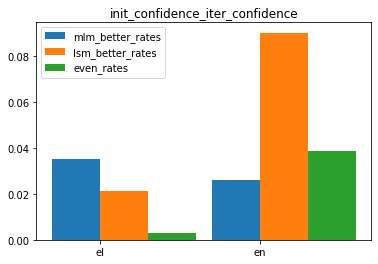

,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
25,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Αυστραλιανό Εργατικό Κόμμα,Αυστραλία,[αυστραλια],[αυστραλια],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λια]",lsm
55,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος του Μεξικού,Μεξικό,[μεξικο],[μεξικο],"[Με, ##ξ, ##ικό]","[Με, ##ξ, ##ικού]",lsm
130,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία της Λουιζιάνα,Λουιζιάνα,"[λου, ##ιζ, ##ιαν, ##α]","[λου, ##ιζ, ##ιαν, ##α]","[Λ, ##ου, ##ι, ##ζ, ##ιά, ##να]",[Ιταλία],lsm
187,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Αυστραλιανή Ομοσπονδιακή Αστυνομία,Αυστραλία,[αυστραλια],[αυστραλια],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λια]",lsm
281,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εθνόσημο του Μεξικού,Μεξικό,[μεξικο],[μεξικο],"[Με, ##ξ, ##ικό]","[Με, ##ξ, ##ικού]",lsm
288,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Μέγας Δούκας του Λουξεμβούργου,Λουξεμβούργο,[λουξεμβουργο],[λουξεμβουργο],"[Λ, ##ου, ##ξε, ##μ, ##βο, ##ύ, ##ρ, ##γο]",[Παρίσι],lsm
447,[DEF;X] [X.Nom] ειδικεύεται στο πεδίο [DEF;Y] ...,Στέφαν Μπάναχ,μαθηματικά,[μαθηματικων],[μαθηματικων],"[μ, ##α, ##θη, ##μα, ##τικών]",[ΗΠΑ],lsm
494,[DEF;X] [X.Nom] ειδικεύεται στο πεδίο [DEF;Y] ...,Κουρτ Λέβιν,ψυχολογία,[ψυχολογιας],[ψυχολογιας],"[ψ, ##υ, ##χο, ##λογίας]",[πόλης],lsm
591,[DEF;X] [X.Nom] ειδικεύεται στο πεδίο [DEF;Y] ...,Νικόλαος Κοπέρνικος,μαθηματικά,[μαθηματικων],[μαθηματικων],"[μ, ##α, ##θη, ##μα, ##τικών]",[Αθηνών],lsm
594,[DEF;X] [X.Nom] ειδικεύεται στο πεδίο [DEF;Y] ...,Σοφία Κοβαλέφσκαγια,μαθηματικά,[μαθηματικων],[μαθηματικων],"[μ, ##α, ##θη, ##μα, ##τικών]",[Αθηνών],lsm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
7,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
8,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
9,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κοινοβούλιο του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
18,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός της Αυστραλίας,Αυστραλία,[αυστραλια],[.],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λία]",mlm
20,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός της Ινδίας,Ινδία,[ινδια],[.],"[Ι, ##νδία]","[Ι, ##νδία]",mlm
27,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος της Ρωσίας,Ρωσία,[ρωσια],[.],"[Ρ, ##ωσία]","[Ρ, ##ωσία]",mlm
35,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Ισραήλ,Ισραήλ,[ισραηλ],[κοσμο],"[Ι, ##σ, ##ρα, ##ήλ]","[Ι, ##σ, ##ρα, ##ήλ]",mlm
37,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης της Αυστραλίας,Αυστραλία,[αυστραλια],[.],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λία]",mlm
39,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος της Γαλλικής Δημοκρατίας,Γαλλία,[γαλλια],[ελλαδα],[Γαλλία],[Γαλλία],mlm
41,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία της Μινεσότα,Μινεσότα,"[μιν, ##εσ, ##οτ, ##α]",[η],"[Μ, ##ινε, ##σό, ##τα]","[Μ, ##ινε, ##σό, ##τα]",mlm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
40,[X] is a legal term in [Y] .,aktiebolag,Sweden,[Sweden],[Sweden],[Sweden],[Denmark],lsm
48,[X] is a legal term in [Y] .,aksjeselskap,Norway,[Norway],[Norway],[Norway],"[the, Netherlands]",lsm
86,[X] is a legal term in [Y] .,Knesset,Israel,[Israel],[Israel],[Israel],[Estonia],lsm
129,[X] is a legal term in [Y] .,Seimas,Lithuania,[Lithuania],[Lithuania],[Lithuania],"[Sei, ##mas]",lsm
165,[X] is a legal term in [Y] .,Storting,Norway,[Norway],[Norway],[Norway],[Parliament],lsm
224,[X] is a legal term in [Y] .,Parks Canada,Canada,[Canada],[Canada],[Canada],"[Parks, Canada]",lsm
243,[X] is a legal term in [Y] .,Hellenic Parliament,Greece,[Greece],[Greece],[Greece],"[Hell, ##enic, Parliament]",lsm
333,[X] is a legal term in [Y] .,Argentine Senate,Argentina,[Argentina],[Argentina],[Argentina],"[Argentine, Senate]",lsm
346,[X] is a legal term in [Y] .,allmennaksjeselskap,Norway,[Norway],[Norway],[Norway],[Sweden],lsm
520,[X] is a legal term in [Y] .,National Council of the Slovak Republic,Slovakia,[Slovakia],[Slovakia],[Slovakia],"[the, Slovak, Republic]",lsm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
4,[X] is a legal term in [Y] .,National Assembly of Quebec,Quebec,[Quebec],"[Quebec, Canada]",[Quebec],[Quebec],mlm
7,[X] is a legal term in [Y] .,Legislative Assembly of British Columbia,British Columbia,"[British, Columbia]",[Canada],"[British, Columbia]","[British, Columbia]",mlm
8,[X] is a legal term in [Y] .,Legislative Assembly of Queensland,Queensland,[Queensland],[Australia],[Queensland],[Queensland],mlm
13,[X] is a legal term in [Y] .,Legislative Council of Hong Kong,Hong Kong,"[Hong, Kong]",[Singapore],"[Hong, Kong]","[Hong, Kong]",mlm
15,[X] is a legal term in [Y] .,Legislative Assembly of Saskatchewan,Saskatchewan,[Saskatchewan],"[Saskatchewan, Canada]",[Saskatchewan],[Saskatchewan],mlm
18,[X] is a legal term in [Y] .,Governor of New York,New York,"[New, York]",[politics],"[New, York]","[New, York]",mlm
20,[X] is a legal term in [Y] .,Governor of New Jersey,New Jersey,"[New, Jersey]",[office],"[New, Jersey]","[New, Jersey]",mlm
38,[X] is a legal term in [Y] .,Lieutenant Governor of New York,New York,"[New, York]",[politics],"[New, York]","[New, York]",mlm
39,[X] is a legal term in [Y] .,Governor of North Carolina,North Carolina,"[North, Carolina]",[office],"[North, Carolina]","[North, Carolina]",mlm
42,[X] is a legal term in [Y] .,Premier of Ontario,Ontario,[Ontario],[Canada],[Ontario],[Ontario],mlm


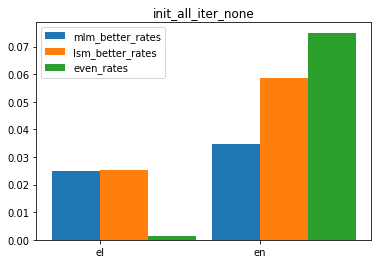

,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
25,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Αυστραλιανό Εργατικό Κόμμα,Αυστραλία,[αυστραλια],[αυστραλια],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λια]",lsm
55,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος του Μεξικού,Μεξικό,[μεξικο],[μεξικο],"[Με, ##ξ, ##ικό]","[Με, ##ξ, ##ικού]",lsm
288,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Μέγας Δούκας του Λουξεμβούργου,Λουξεμβούργο,[λουξεμβουργο],[λουξεμβουργο],"[Λ, ##ου, ##ξε, ##μ, ##βο, ##ύ, ##ρ, ##γο]","[στο, ##ι, ##χείο]",lsm
311,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος της Κιργιζίας,Κιργιζία,"[κι, ##ργι, ##ζια]","[κι, ##ργι, ##ζια]","[Κ, ##ι, ##ρ, ##γ, ##ι, ##ζ, ##ία]",[Ελλάδα],lsm
312,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κατάλογος πρωθυπουργών της Σενεγάλης,Σενεγάλη,"[σε, ##νε, ##γαλ, ##η]","[σε, ##νε, ##γαλ, ##η]","[Σε, ##νε, ##γ, ##άλη]","[Σε, ##νε, ##γ, ##άλη, ##ς]",lsm
447,[DEF;X] [X.Nom] ειδικεύεται στο πεδίο [DEF;Y] ...,Στέφαν Μπάναχ,μαθηματικά,[μαθηματικων],[μαθηματικων],"[μ, ##α, ##θη, ##μα, ##τικών]",[ΗΠΑ],lsm
494,[DEF;X] [X.Nom] ειδικεύεται στο πεδίο [DEF;Y] ...,Κουρτ Λέβιν,ψυχολογία,[ψυχολογιας],[ψυχολογιας],"[ψ, ##υ, ##χο, ##λογίας]",[πόλης],lsm
591,[DEF;X] [X.Nom] ειδικεύεται στο πεδίο [DEF;Y] ...,Νικόλαος Κοπέρνικος,μαθηματικά,[μαθηματικων],[μαθηματικων],"[μ, ##α, ##θη, ##μα, ##τικών]",[Αθηνών],lsm
598,[DEF;X] [X.Nom] ειδικεύεται στο πεδίο [DEF;Y] ...,Φρανκ Νέλσον Κόουλ,μαθηματικά,[μαθηματικων],[μαθηματικων],"[μ, ##α, ##θη, ##μα, ##τικών]",[ΗΠΑ],lsm
695,Η μητρική γλώσσα [DEF;X] [X.Gen] είναι τα [Y.A...,Βλαντίμιρ Πούτιν,Ρωσικά,[ρωσικα],[ρωσικα],"[Ρ, ##ω, ##σικά]","[α, ##γγλικά]",lsm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
7,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
8,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης του Καναδά,Καναδάς,[καναδα],[κοσμο],"[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
9,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κοινοβούλιο του Καναδά,Καναδάς,[καναδα],"[τομεα, του, ισλαμ, .]","[Κ, ##αν, ##α, ##δ, ##ά]","[Κ, ##αν, ##α, ##δ, ##ά]",mlm
18,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός της Αυστραλίας,Αυστραλία,[αυστραλια],[.],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λία]",mlm
20,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός της Ινδίας,Ινδία,[ινδια],[.],"[Ι, ##νδία]","[Ι, ##νδία]",mlm
27,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος της Ρωσίας,Ρωσία,[ρωσια],[.],"[Ρ, ##ωσία]","[Ρ, ##ωσία]",mlm
35,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Ισραήλ,Ισραήλ,[ισραηλ],[κοσμο],"[Ι, ##σ, ##ρα, ##ήλ]","[Ι, ##σ, ##ρα, ##ήλ]",mlm
37,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης της Αυστραλίας,Αυστραλία,[αυστραλια],[.],"[Α, ##υ, ##στ, ##ρα, ##λία]","[Α, ##υ, ##στ, ##ρα, ##λία]",mlm
39,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος της Γαλλικής Δημοκρατίας,Γαλλία,[γαλλια],[ελλαδα],[Γαλλία],[Γαλλία],mlm
41,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία της Μινεσότα,Μινεσότα,"[μιν, ##εσ, ##οτ, ##α]","[., .]","[Μ, ##ινε, ##σό, ##τα]","[Μ, ##ινε, ##σό, ##τα]",mlm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
40,[X] is a legal term in [Y] .,aktiebolag,Sweden,[Sweden],[Sweden],[Sweden],[Denmark],lsm
41,[X] is a legal term in [Y] .,Western Australian Legislative Assembly,Western Australia,"[Western, Australia]","[Western, Australia]","[Western, Australia]",[Australia],lsm
48,[X] is a legal term in [Y] .,aksjeselskap,Norway,[Norway],[Norway],[Norway],"[the, Netherlands]",lsm
86,[X] is a legal term in [Y] .,Knesset,Israel,[Israel],[Israel],[Israel],[Estonia],lsm
129,[X] is a legal term in [Y] .,Seimas,Lithuania,[Lithuania],[Lithuania],[Lithuania],"[Sei, ##mas]",lsm
165,[X] is a legal term in [Y] .,Storting,Norway,[Norway],[Norway],[Norway],[Parliament],lsm
224,[X] is a legal term in [Y] .,Parks Canada,Canada,[Canada],[Canada],[Canada],"[Parks, Canada]",lsm
243,[X] is a legal term in [Y] .,Hellenic Parliament,Greece,[Greece],[Greece],[Greece],"[Hell, ##enic, Parliament]",lsm
333,[X] is a legal term in [Y] .,Argentine Senate,Argentina,[Argentina],[Argentina],[Argentina],"[Argentine, Senate]",lsm
346,[X] is a legal term in [Y] .,allmennaksjeselskap,Norway,[Norway],[Norway],[Norway],[Sweden],lsm


,prompt,sub_label,obj_label,tokenized_obj_label_inflection_lsm,pred_lsm,tokenized_obj_label_inflection_mlm,pred_mlm,better
4,[X] is a legal term in [Y] .,National Assembly of Quebec,Quebec,[Quebec],"[Quebec, law]",[Quebec],[Quebec],mlm
7,[X] is a legal term in [Y] .,Legislative Assembly of British Columbia,British Columbia,"[British, Columbia]",[Canada],"[British, Columbia]","[British, Columbia]",mlm
8,[X] is a legal term in [Y] .,Legislative Assembly of Queensland,Queensland,[Queensland],[Australia],[Queensland],[Queensland],mlm
13,[X] is a legal term in [Y] .,Legislative Council of Hong Kong,Hong Kong,"[Hong, Kong]","[mainland, China]","[Hong, Kong]","[Hong, Kong]",mlm
15,[X] is a legal term in [Y] .,Legislative Assembly of Saskatchewan,Saskatchewan,[Saskatchewan],"[Saskatchewan, Canada]",[Saskatchewan],[Saskatchewan],mlm
18,[X] is a legal term in [Y] .,Governor of New York,New York,"[New, York]",[politics],"[New, York]","[New, York]",mlm
20,[X] is a legal term in [Y] .,Governor of New Jersey,New Jersey,"[New, Jersey]",[office],"[New, Jersey]","[New, Jersey]",mlm
38,[X] is a legal term in [Y] .,Lieutenant Governor of New York,New York,"[New, York]",[politics],"[New, York]","[New, York]",mlm
39,[X] is a legal term in [Y] .,Governor of North Carolina,North Carolina,"[North, Carolina]",[office],"[North, Carolina]","[North, Carolina]",mlm
42,[X] is a legal term in [Y] .,Premier of Ontario,Ontario,[Ontario],[Canada],[Ontario],[Ontario],mlm


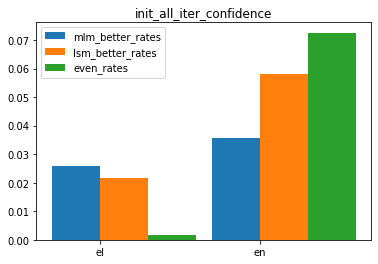

In [2]:
#os.system('jupyter nbconvert --to html result_analysis.ipynb')

langs = [
         'el', 
        'en'
        ]

def read_results(folder_name, filename, task = '*'):
    path = folder_name + filename
    data = []
    
    for jsname in glob.glob(path +'/%s.jsonl'%task):
        
        with open(jsname, 'r') as json_file:
            json_list = list(json_file)
            for line in json_list[:]:
                result = json.loads(line)
                
                keys = [ 'prompt', 'sub_label', 'obj_label']
                res = [result[i] for i in keys]

                obj = result['tokenized_obj_label_inflection']
                pred_ind = result['num_mask'] - 1
                pred = result['pred'][pred_ind]
                correct = int(pred == obj)
                res+=[obj, pred, correct]

#                 res+=[''.join(obj), ''.join(pred)]
                data.append(res)
                        
    return pd.DataFrame(data, columns = ['prompt', 'sub_label', 'obj_label', 'tokenized_obj_label_inflection', 'pred', 'correct'])

def comp(x, y):
    if 1 ==x !=y:
        return 'lsm'
    if 1 ==y !=x:
        return 'mlm'
    if 1 ==y ==x:
        return 'same'
    return None

def show_diff(s_res, m_res, lang):
#     print(lang)
    mbetter = []
    sbetter = []
    outer = pd.merge(s_res, m_res, how = 'outer',suffixes=('_lsm', '_mlm'), on=['prompt', 'sub_label', 'obj_label'])
    df = pd.merge(s_res, m_res, how = 'inner',suffixes=('_lsm', '_mlm'), on=['prompt', 'sub_label', 'obj_label'])
#     display(s_res.head())
#     display(m_res.head())
    df.head()
    df['better'] = np.vectorize(comp)(df['correct_lsm'], df['correct_mlm'] )
    df.drop(['correct_lsm', 'correct_mlm'], axis=1, inplace=True)
    display(df[df['better']=='lsm'].head(20))
    display(df[df['better']=='mlm'].head(20))

    sbr = len(df[df['better']=='lsm'])/len(df)
    mbr = len(df[df['better']=='mlm'])/len(df)
    samer = len(df[df['better']=='same'])/len(df)

    return mbr, sbr, samer


filenames = ['/init_confidence_iter_none/', 
             '/init_confidence_iter_confidence/',              '/init_all_iter_none/', '/init_all_iter_confidence/'
            ]
for filename in filenames:
    
    mb_rates = []
    sb_rates = []
    same_rates = []
    
    for lang in langs:
        folder_name = 'exp/exp1_' + lang

        s_res = read_results(folder_name, filename)
        m_res = read_results(folder_name + '_m', filename)
        
        mbr, sbr, samer = show_diff(s_res, m_res, lang)
        mb_rates.append(mbr)
        sb_rates.append(sbr)
        same_rates.append(samer)

    # Width of a bar 
    width = 0.3       
    N = len(langs)
    ind = np.arange(N)
    
    # Plotting
    plt.title(filename[1:-1])
    plt.bar(ind, mb_rates, width, label='mlm_better_rates')
    plt.bar(ind + width, sb_rates, width, label='lsm_better_rates')
    plt.bar(ind +2* width, same_rates, width, label='even_rates')

    plt.xticks(ind + width / 2, langs)
    
    plt.legend(loc='best')
    plt.savefig(filename[1:-1])
    plt.show()


In [61]:
# calculate single/multi token accuracies
def counting(json_list):
    multi_correct = 0
    multi_n = 0
    single_correct = 0
    single_n = 0
    
    multi_nn = 0
    mul_cora = 0
    
    j = 0
    for json_str in json_list:
        mul_cor = 0
        result = json.loads(json_str)
        obj = result['tokenized_obj_label_inflection']
        pred_ind = result['num_mask'] - 1
        pred = result['pred'][pred_ind]
        correct = int(pred == obj)
        #if correct:
            #print(pred, obj)
        if len(obj) > 1:
            multi_n += 1
            multi_correct += correct
            multi_nn += len(obj)
            for o, p in zip(pred, obj):
                if o == p:
                    mul_cor += 1
            mul_cora += mul_cor / len(obj)
        else:
            single_n += 1
            single_correct += correct
            multi_nn += 1
            mul_cora += correct
    return multi_correct, multi_n, single_correct, single_n, multi_nn, mul_cora

def cal_acc(folder_name):
    path = folder_name + '/'
    mc, mn, sc, sn, mnn, mlc = 0, 0, 0, 0, 0, 0
    for f_name in os.listdir(path):
        if not f_name.endswith('jsonl'):
            continue
        with open(path + f_name, 'r') as json_file:
            json_list = list(json_file)
            a, b, c, d, e, f = counting(json_list)
            mc += a
            mn += b
            sc += c
            sn += d
            mnn += e
            mlc += f
    return mc/mn, sc/sn, mlc/mnn, mlc/mn

In [62]:
# extract accuracy results from .out files
def extract_result(path):
    data = []
    _, exp_group, name = path.split('\\')
    folder_name = path[:-4]
    if exp_group!='exp1_el':
        return
    data.append(exp_group[5:])
    name = name[:-4]
    components = name.split('_')
    if len(components)>4:
        return None
    data+= [components[i] for i in [1,3]]
    
    for line in open(path, "r", encoding="utf8").readlines()[-1:]:
        res = [line.split()[i] for i in [3, 7]]
        data.append(float(res[0][-6:])*100)
        data.append(float(res[1][:6])*100)
        multi_acc, single_acc, part_acc, part_w_acc = cal_acc(folder_name)
        data.append((multi_acc, single_acc, part_acc, part_w_acc))
#         data+=[single_acc*100, multi_acc*100]

    return data

files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file))
    
df = pd.DataFrame([i for i in res if i is not None], columns = ['lang', 'init','refine', 'acc per fact', 'acc per relation', 'whole',
#                                                                 'single', 'multi'
                                                               ])
df = df.drop(['acc per relation'], axis=1)
# display(df.head())
lang_vals = df['lang'].unique()
df = df.groupby(by=[ "init", 'refine', 'lang']).mean().round(2).reset_index()
df = df.astype('str')
dfs = [df[df['lang'] ==i].reset_index(drop = True).drop('lang', axis=1) for i in df['lang'].unique()]
df = dfs[0]
for df_ in dfs[1:]:
    df = df.merge(df_, on=['init','refine'])
df = df.set_axis(['init','refine'] + ['acc per fact_' + val for val in lang_vals], axis=1, inplace=False)

df
# df = pd.merge(df[df['lang'] =='en'].reset_index(drop = True).drop('lang', axis=1), df[df['lang'] =='zh'].reset_index(drop = True).drop('lang', axis=1), on=['init','refine'])


,init,refine,acc per fact_el
0,all,confidence,2.31
1,all,none,2.65
2,confidence,confidence,2.44
3,confidence,none,2.68


In [63]:
res

[None,
 None,
 None,
 None,
 None,
 None,
 ['el',
  'all',
  'confidence',
  2.31,
  1.8399999999999999,
  (0.003861003861003861,
   0.05130632336236274,
   0.010141209039904843,
   0.04133097383097383)],
 ['el',
  'all',
  'none',
  2.65,
  2.19,
  (0.004118404118404118,
   0.0594471790988262,
   0.011496721087146451,
   0.04685542685542685)],
 ['el',
  'confidence',
  'confidence',
  2.44,
  2.01,
  (0.009009009009009009,
   0.047141234380916316,
   0.011193867132225676,
   0.04562113133541705)],
 ['el',
  'confidence',
  'none',
  2.68,
  2.2800000000000002,
  (0.010167310167310168,
   0.05130632336236274,
   0.012355697007700672,
   0.05035622357050929)],
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
result = [23.02, 12.55, 5.1, 15.68]
df1 = pd.DataFrame([result], columns =['en', 'nl', 'el', 'zh'])

In [7]:
df1

,en,nl,el,zh
0,23.02,12.55,5.1,15.68


In [64]:
def extract_result(path, lang):
    data = []
    _, exp_group, name = path.split('\\')
    folder_name = path[:-4]
    if exp_group!=lang:
        return
    data.append(exp_group[5:])
    name = name[:-4]
    components = name.split('_')
    if len(components)>4:
        return None
    data+= [components[i] for i in [1,3]]
    
    for line in open(path, "r", encoding="utf8").readlines()[-1:]:
        print(line)
        if len(line.split()) < 2:
            continue
        res = [line.split()[i] for i in [3, 7]]
        data.append(float(res[0][-6:])*100)
        data.append(float(res[1][:6])*100)
        multi_acc, single_acc, part_acc, part_w_acc = cal_acc(folder_name)
        data.append((multi_acc, single_acc, part_acc, part_w_acc))
#         data+=[single_acc*100, multi_acc*100]

    return data

In [65]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'exp1_en_m'))

acc per fact 4907/45684=0.1074	acc per relation 0.1072878549710272	avg iter 3.888083806198167	num_max_mask 1853

acc per fact 4910/45684=0.1075	acc per relation 0.10735522888205526	avg iter 4.399301615015277	num_max_mask 1853

acc per fact 4971/45684=0.1088	acc per relation 0.10867397868966477	avg iter 1.0	num_max_mask 1853

acc per fact 2957/45684=0.0647	acc per relation 0.06483106966263295	avg iter 4.066171977302488	num_max_mask 1853

acc per fact 4966/45684=0.1087	acc per relation 0.10864838252650147	avg iter 4.34089917066783	num_max_mask 1853

acc per fact 4989/45684=0.1092	acc per relation 0.10915043685844973	avg iter 3.0	num_max_mask 1853

acc per fact 4980/45684=0.1090	acc per relation 0.10894098009292656	avg iter 4.126756874727193	num_max_mask 1853

acc per fact 4979/45684=0.1090	acc per relation 0.10891880513244113	avg iter 4.339153208206024	num_max_mask 1853

acc per fact 5018/45684=0.1098	acc per relation 0.109770009298755	avg iter 3.0	num_max_mask 1853



In [66]:
res

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['en_m',
  'all',
  'confidence',
  10.74,
  10.72,
  (0.023860199395093536,
   0.22578426704755858,
   0.05215883029728029,
   0.2049874555699581)],
 ['en_m',
  'all',
  'left',
  10.75,
  10.73,
  (0.02408423882603338,
   0.2256255620800931,
   0.05219663109184349,
   0.20513601504975987)],
 ['en_m',
  'all',
  'none',
  10.879999999999999,
  10.86,
  (0.02102236660318883,
   0.2331904988626144,
   0.05249872451537993,
   0.20632326104209153)],
 ['en_m',
  'confidence',
  'confidence',
  6.47,
  6.4799999999999995,
  (0.0355102498039655,
   0.1061207215785854,
   0.038274360963694076,
   0.1504206252862016)],
 ['en_m',
  'confidence',
  'left',
  10.870000000000001,
  10.86,
  (0.03707852582054442,
   0.21017827858011956,
   0.05483745116788985,
   0.21551460262393393)],
 ['en_m',
  'confidence',
  'none',
  10.92,
  10.91,
  (0.03692916619991785,
   0.211606

In [67]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'exp1_nl_m'))
    
df = pd.DataFrame([i for i in res if i is not None], columns = ['lang', 'init','refine', 'acc per fact', 'acc per relation', 'whole',
#                                                                 'single', 'multi'
                                                               ])
df = df.drop(['acc per relation'], axis=1)
# display(df.head())
lang_vals = df['lang'].unique()
df = df.groupby(by=[ "init", 'refine', 'lang']).mean().round(2).reset_index()
df = df.astype('str')
dfs = [df[df['lang'] ==i].reset_index(drop = True).drop('lang', axis=1) for i in df['lang'].unique()]
df = dfs[0]
for df_ in dfs[1:]:
    df = df.merge(df_, on=['init','refine'])
df = df.set_axis(['init','refine'] + ['acc per fact_' + val for val in lang_vals], axis=1, inplace=False)

df

acc per fact 3668/38291=0.0958	acc per relation 0.10189833509869488	avg iter 4.6974173553719005	num_max_mask 2048

acc per fact 3740/38291=0.0977	acc per relation 0.1039751183308205	avg iter 1.0	num_max_mask 2048

acc per fact 3705/38291=0.0968	acc per relation 0.10286119165898301	avg iter 5.147417355371901	num_max_mask 2048

acc per fact 3765/38291=0.0983	acc per relation 0.10474702037327165	avg iter 3.0	num_max_mask 2048



,init,refine,acc per fact_nl_m
0,all,confidence,9.58
1,all,none,9.77
2,confidence,confidence,9.68
3,confidence,none,9.83


In [68]:
res

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['nl_m',
  'all',
  'confidence',
  9.58,
  10.18,
  (0.01997723615526512,
   0.24656571963783952,
   0.039657656975390046,
   0.15561260533885046)],
 ['nl_m',
  'all',
  'none',
  9.77,
  10.39,
  (0.018368067820558106,
   0.2553855760224789,
   0.04004950106778527,
   0.15715016163326537)],
 ['nl_m',
  'confidence',
  'confidence',
  9.68,
  10.280000000000001,
  (0.027706797108855954,
   0.2415218609865471,
   0.04237542573033195,
   0.1685070545039881)],
 ['nl_m',
  'confidence',
  'none',
  9.83,
  10.47,
  (0.029592998155343615,
   0.2350140493287543,
   0.04159894221558405,
   0.16323001082803273)],
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [69]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'exp1_zh_m'))
    
df = pd.DataFrame([i for i in res if i is not None], columns = ['lang', 'init','refine', 'acc per fact', 'acc per relation', 'whole',
#                                                                 'single', 'multi'
                                                               ])
df = df.drop(['acc per relation'], axis=1)
# display(df.head())
lang_vals = df['lang'].unique()
df = df.groupby(by=[ "init", 'refine', 'lang']).mean().round(2).reset_index()
df = df.astype('str')
dfs = [df[df['lang'] ==i].reset_index(drop = True).drop('lang', axis=1) for i in df['lang'].unique()]
df = dfs[0]
for df_ in dfs[1:]:
    df = df.merge(df_, on=['init','refine'])
df = df.set_axis(['init','refine'] + ['acc per fact_' + val for val in lang_vals], axis=1, inplace=False)

df

acc per fact 732/23142=0.0316	acc per relation 0.03149797418095788	avg iter 4.014431239388794	num_max_mask 4544

acc per fact 464/23142=0.0201	acc per relation 0.019023772553093964	avg iter 1.0	num_max_mask 4544

acc per fact 1202/23142=0.0519	acc per relation 0.0549478993969092	avg iter 4.144991511035654	num_max_mask 4544

acc per fact 1209/23142=0.0522	acc per relation 0.05507351432446641	avg iter 4.36383701188455	num_max_mask 4544

acc per fact 1194/23142=0.0516	acc per relation 0.054582149028162684	avg iter 3.0	num_max_mask 4544



,init,refine,acc per fact_zh_m
0,all,confidence,3.16
1,all,none,2.01
2,confidence,confidence,5.19
3,confidence,left,5.22
4,confidence,none,5.16


In [70]:
res

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['zh_m',
  'all',
  'confidence',
  3.16,
  3.1399999999999997,
  (0.02934763649049363,
   0.28095238095238095,
   0.01630733507820319,
   0.06644961708737218)],
 ['zh_m',
  'all',
  'none',
  2.01,
  1.9,
  (0.017442874585731728,
   0.3047619047619048,
   0.012220657827919925,
   0.04979710230560568)],
 ['zh_m',
  'confidence',
  'confidence',
  5.19,
  5.489999999999999,
  (0.05062794348508634,
   0.19523809523809524,
   0.025588771314821148,
   0.10426989127603992)],
 ['zh_m',
  'confidence',
  'left',
  5.220000000000001,
  5.5,
  (0.050933193790336645,
   0.19523809523809524,
   0.02558997312111476,
   0.10427478843229757)],
 ['zh_m',
  'confidence',
  'none',
  5

In [71]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'exp1_jp_m'))
    
df = pd.DataFrame([i for i in res if i is not None], columns = ['lang', 'init','refine', 'acc per fact', 'acc per relation', 'whole',
#                                                                 'single', 'multi'
                                                               ])
df = df.drop(['acc per relation'], axis=1)
# display(df.head())
lang_vals = df['lang'].unique()
df = df.groupby(by=[ "init", 'refine', 'lang']).mean().round(2).reset_index()
df = df.astype('str')
dfs = [df[df['lang'] ==i].reset_index(drop = True).drop('lang', axis=1) for i in df['lang'].unique()]
df = dfs[0]
for df_ in dfs[1:]:
    df = df.merge(df_, on=['init','refine'])
df = df.set_axis(['init','refine'] + ['acc per fact_' + val for val in lang_vals], axis=1, inplace=False)

res

acc per fact 216/25144=0.0086	acc per relation 0.008525739218480793	avg iter 5.942734375	num_max_mask 890

acc per fact 144/25144=0.0057	acc per relation 0.005580905768158023	avg iter 1.0	num_max_mask 890



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['jp_m',
  'all',
  'confidence',
  0.86,
  0.8500000000000001,
  (0.005287009063444109,
   0.06859756097560976,
   0.004531990865576303,
   0.02187495691712711)],
 ['jp_m',
  'all',
  'none',
  0.5700000000000001,
  0.5499999999999999,
  (0.0020560590802282644,
   0.07240853658536585,
   0.0034350083282119596,
   0.01658005530424967)],
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [48]:
# generate latex source text
def print_table(df):
    prev_t=1
    now_t=2
    prev_f=1
    now_f=2
    j='&'

    for row in df:
        lists = list(row)
        now_t = lists[0]
        now_f = lists[1]    
        if prev_t!= now_t:
            print('\hline')
        else:
            lists[0] = '~'
            if prev_f == now_f:
                lists[1] = '~'
                print('\cline{4-6}')
        prev_t = now_t
        prev_f = now_f
        new_line = j.join(lists)
        print(new_line+'\\\\')
    print('\hline')

print_table(df)

\hline
i&n&i&t\\
\hline
r&e&f&i&n&e\\
\hline
a&c&c& &p&e&r& &f&a&c&t&_&j&p&_&m\\
\hline


In [72]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'en_el'))

acc per fact 548/13034=0.0420	acc per relation 0.05351540066750724	avg iter 6.252967359050445	num_max_mask 1338

acc per fact 509/13034=0.0391	acc per relation 0.04947365708849796	avg iter 1.0	num_max_mask 1338



In [73]:
for r in res:
    if r is not None:
        print(r)

['', 'all', 'confidence', 4.2, 5.35, (0.011231382762269065, 0.5488621151271754, 0.008683641211009719, 0.05151667147679193)]
['', 'all', 'none', 3.91, 4.9399999999999995, (0.006266786034019696, 0.5783132530120482, 0.007935357376669418, 0.04707739404369989)]


In [74]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'en_jp'))

acc per fact 822/25144=0.0327	acc per relation 0.03397630219945658	avg iter 5.9565625	num_max_mask 890

acc per fact 772/25144=0.0307	acc per relation 0.032363253860672646	avg iter 1.0	num_max_mask 890



In [75]:
for r in res:
    if r is not None:
        print(r)

['', 'all', 'confidence', 3.27, 3.39, (0.02156764014770057, 0.2347560975609756, 0.011602349661759215, 0.05600207646406034)]
['', 'all', 'none', 3.0700000000000003, 3.2300000000000004, (0.01850453172205438, 0.25228658536585363, 0.009616693207998237, 0.046417734688756845)]


In [76]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'en_nl'))

acc per fact 3735/38291=0.0975	acc per relation 0.10088904848170943	avg iter 4.054752066115703	num_max_mask 2048

acc per fact 3690/38291=0.0964	acc per relation 0.09968909747420893	avg iter 1.0	num_max_mask 2048



In [77]:
for r in res:
    if r is not None:
        print(r)

['', 'all', 'confidence', 9.75, 10.08, (0.02417677302876879, 0.24344364658133, 0.05387543103167697, 0.2114017021175858)]
['', 'all', 'none', 9.64, 9.959999999999999, (0.020408964245064564, 0.24742428972837965, 0.053018495119678384, 0.20803917291024318)]


In [78]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'zh_el'))

acc per fact 519/13034=0.0398	acc per relation 0.05475925331226243	avg iter 5.953857566765579	num_max_mask 1338

acc per fact 469/13034=0.0360	acc per relation 0.04668434739044286	avg iter 1.0	num_max_mask 1338



In [79]:
for r in res:
    if r is not None:
        print(r)

['', 'all', 'confidence', 3.9800000000000004, 5.47, (0.012452185236428746, 0.4899598393574297, 0.009782995426361133, 0.05803871316099686)]
['', 'all', 'none', 3.5999999999999996, 4.66, (0.006592333360462277, 0.5194109772423026, 0.008435561448669521, 0.05004491057534924)]


In [80]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'zh_jp'))

acc per fact 312/25144=0.0124	acc per relation 0.012400041274080852	avg iter 5.7709375	num_max_mask 890

acc per fact 354/25144=0.0141	acc per relation 0.014080845844219364	avg iter 1.0	num_max_mask 890



In [81]:
for r in res:
    if r is not None:
        print(r)

['', 'all', 'confidence', 1.24, 1.24, (0.009021483719368915, 0.07393292682926829, 0.00965013549902972, 0.04657915352149994)]
['', 'all', 'none', 1.41, 1.4000000000000001, (0.010196374622356496, 0.08460365853658537, 0.009156331412095027, 0.04419566612101859)]


In [82]:
files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file, 'zh_nl'))

acc per fact 4246/38291=0.1109	acc per relation 0.11585092763165339	avg iter 4.125206611570248	num_max_mask 2048

acc per fact 4385/38291=0.1145	acc per relation 0.11902731896296705	avg iter 1.0	num_max_mask 2048



In [83]:
for r in res:
    if r is not None:
        print(r)

['', 'all', 'confidence', 11.09, 11.58, (0.02154715648180855, 0.2885576022478926, 0.04608470698621433, 0.18083169474315122)]
['', 'all', 'none', 11.450000000000001, 11.899999999999999, (0.014992739118489737, 0.31244146113019045, 0.0471591247372177, 0.18504760052799615)]
